# Fuzzy Logics

**Author: Brian van den Berg**

In this notebook, we will be exploring the usability of the Python library 'skfuzzy'. This is a library focussed around implementing Fuzzy Systems, which is a technique much like expert systems based on detirming values on the basis of mutliple input values. To show the working of fuzzy systems I will be implementing fuzzy systems to controll the speed of fans based on temperature and humidity.

In [13]:
import sys
from datetime import date
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Print the version register
print(f'Version register as of {date.today()}:')
print(f'python3: {sys.version}')
print(f'numpy: {np.__version__}')
print(f'skfuzzy: {fuzz.__version__}')

Version register as of 2023-12-01:
python3: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
numpy: 1.26.2
skfuzzy: 0.4.2


## Input Variables

To make a fuzzy system function, we will need to define the input variables and ranges that the system will have to work with. The fuzz.trimf function detirmines the shape of the triangles associated with different states of the input.

Underneath the code cell, you can view the fuzzy logic associated with the input variables.

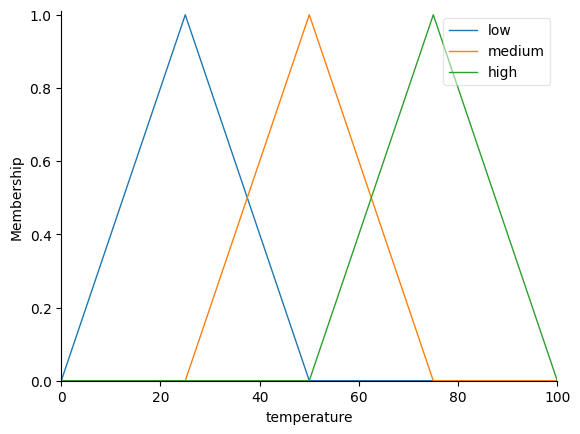

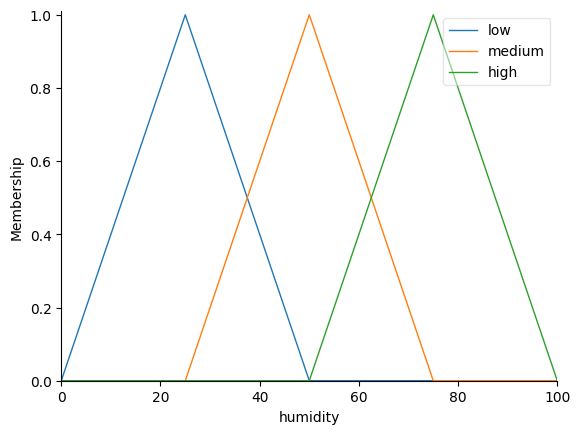

In [14]:
# Input variables
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')

# Membership functions
temperature['low'] = fuzz.trimf(temperature.universe, [0, 25, 50])
temperature['medium'] = fuzz.trimf(temperature.universe, [25, 50, 75])
temperature['high'] = fuzz.trimf(temperature.universe, [50, 75, 100])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 25, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [25, 50, 75])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 75, 100])

# Display the two input variables and their fuzzy logic
temperature.view()
humidity.view()

## Output Variable

The goal of this example implementation is to turn the fans of our system at a certain percentage depending on the state of the machine. To achieve this goal, we can represent the fan speed as percentage between 0 and 100 using the same three states of the fan.

In [15]:
# Output variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership function
fan_speed['slow'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['fast'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])

## Rules

To implement the variables in our fuzzy controller, we will need to associate the states with eachother in the form of rules. In our case, we are associating all the states with the equal ones in other variables.

As an example, a high temperature and a high humidity would mean a high fan speed.

The rules are then added to a controll system, which is then used to create a controll system for calculating fan speeds.

In [18]:
# Rules
rule1 = ctrl.Rule(temperature['low'] | humidity['low'], fan_speed['slow'])
rule2 = ctrl.Rule(temperature['medium'] | humidity['medium'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['high'] | humidity['high'], fan_speed['fast'])

# Control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fan_speed_ctrl = ctrl.ControlSystemSimulation(fan_ctrl)

## Usage of the System

To use the Fuzzy Controller, we simply pass the states of all variables except the fan speed and then we tell it to compute the fan speed using compute().

In the image underneath the code cell you can see a detailed graphical representation of the computation. This depicts that a high humidity and just under normal temperature would indicate a fan speed of just above average.

Fan Speed: 51.530612244898016


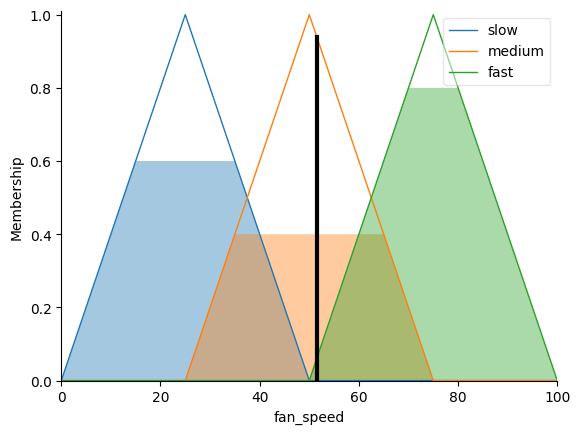

In [19]:
# Input values
fan_speed_ctrl.input['temperature'] = 35
fan_speed_ctrl.input['humidity'] = 70

# Compute the fuzzy output
fan_speed_ctrl.compute()

# Print the output
print("Fan Speed:", fan_speed_ctrl.output['fan_speed'])

# Plot the fuzzy output
fan_speed.view(sim=fan_speed_ctrl)